<a href="https://colab.research.google.com/github/PavelStelmakhV/hw305-scipy/blob/main/Hw5.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import solve_ivp
from scipy import integrate

In [20]:
alpha = 0.5
beta = 0.3
N = 1_000_000
S0 = 990_000
I0 = 7000
R0 = 3000
t0, tf = 0, 25
t = np.linspace(t0, tf, 26)

## Susceptible

In [21]:
def dSdt(t, S):
    return -alpha * S

In [22]:
susceptible = solve_ivp(dSdt, (t0, tf), [S0], dense_output=True, t_eval=t)

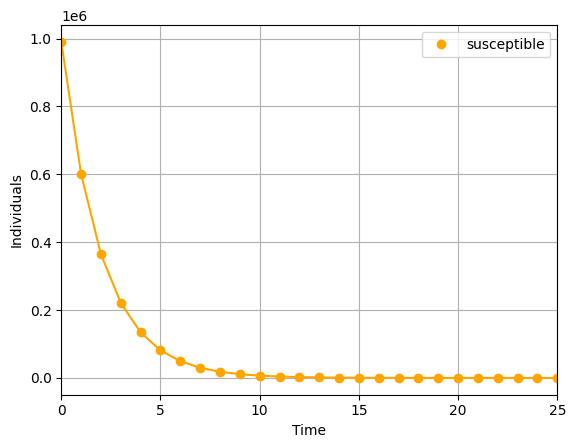

In [23]:
plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')
plt.legend()
plt.xlim(t0, tf)
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.grid()

## Infected

In [24]:
def dIdt(t, I):
    return alpha * susceptible.sol(t)[0] - beta * I

In [25]:
infected = solve_ivp(dIdt, (t0, tf), [I0], dense_output=True, t_eval=t)

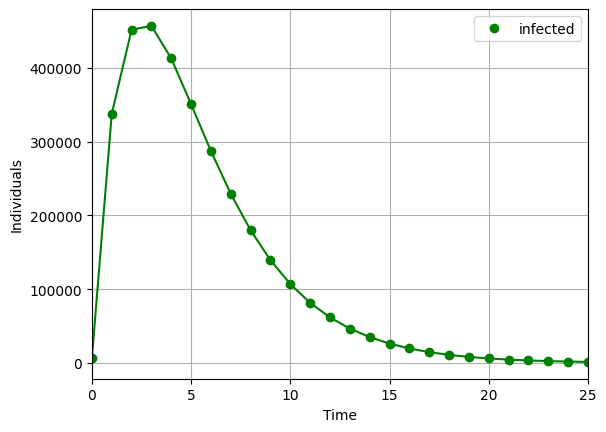

In [26]:
plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')
plt.legend()
plt.xlim(t0, tf)
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.grid()

## Recovered

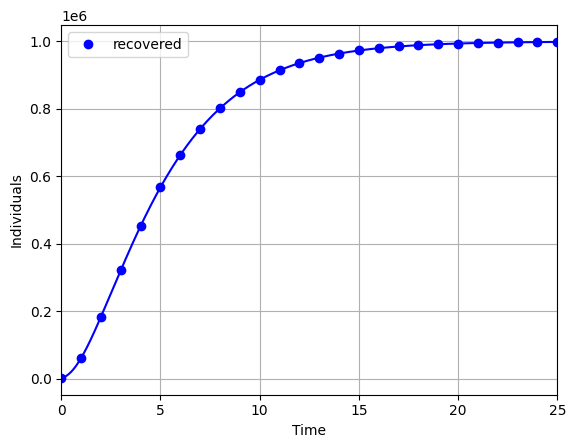

In [27]:
recovered = interp1d(susceptible.t, N - susceptible.y[0] - infected.y[0], kind='cubic')
plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
more_date = np.linspace(t0, tf, 10000)
plt.plot(more_date, recovered(more_date), color='blue')
plt.legend()
plt.xlim(t0, tf)
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.grid()

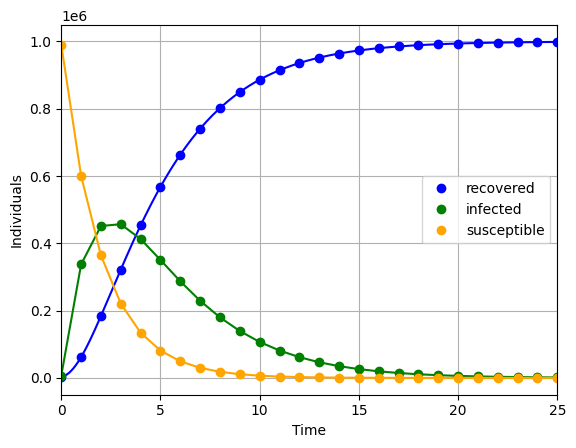

In [28]:
plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
plt.plot(more_date, recovered(more_date), color='blue')

plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')

plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')

plt.legend()
plt.xlim(t0, tf)
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.grid()
     

# Метод наименьших квадратов

In [29]:
from scipy.optimize import leastsq

t = np.linspace(t0, tf, 26)

In [41]:
def find_S(t, s, a):
  return s * np.exp(-a * t)

In [35]:
def diff_S(p, y, t):
  s, a = p
  return y - find_S(t, s, a)

In [50]:
y = susceptible.y[0]
p0 = (10e6, 1)
aprx_s, _ = leastsq(diff_S, p0, args=(y, t))
print(aprx_s)

[9.89968586e+05 4.99987740e-01]


In [44]:
def find_I(t, i, s, a):
  return (i + a * s * t) * np.exp(-a * t)

In [45]:
def diff_I(p, y, t):
  i, s, a = p
  return y - find_I(t, i, s, a)

In [53]:
y = infected.y[0]
p0 = (10e4, 10e6, 1)
aprx_i, _ = leastsq(diff_I, p0, args=(y, t))
print(aprx_i)

[1.00145579e+04 1.24828665e+06 3.82355891e-01]


In [ ]:
plt.plot(susceptible.t, N - susceptible.y[0] - infected.y[0], 'o', color='blue', label='recovered')
plt.plot(more_date, recovered(more_date), color='blue')

plt.plot(infected.t, infected.y[0], 'o', color='green', label='infected')
plt.plot(infected.t, infected.sol(infected.t)[0], color='green')

plt.plot(susceptible.t, susceptible.y[0], 'o', color='orange', label='susceptible')
plt.plot(susceptible.t, susceptible.sol(susceptible.t)[0], color='orange')

plt.legend()
plt.xlim(t0, tf)
plt.xlabel('Time')
plt.ylabel('Individuals')
plt.grid()